## Quantum circuit computations of 2-flavor neutrino oscillation : P($\nu_e \rightarrow \nu_e$)

In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit, transpile, BasicAer, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [ ]:
# Set your token to 'API_TOKEN' 
# Run this cell only once
IBMQ.save_account('API_TOKEN')

In [2]:
# Loading your IBMQ account(s)
provider = IBMQ.load_account()
clear_output()

In [3]:
provider.backends()
clear_output()

In [4]:
from qiskit.providers.ibmq import least_busy
# Select least busy backend
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("Least busy backend:", backend_lb)

Least busy backend: ibmq_athens


In [5]:
# Generate quantum register
q = QuantumRegister(1)
# Generate classical register
c = ClassicalRegister(1)

In [6]:
# Set parameters
# Difference of mass squared between m1 & m2(from NuFIT)
delta_m_12 = 7.42e-5
# Dirac constant(from CODATA)
h_bar = 4.135667696e-15/(2*np.pi)
# Theta_12(from NuFIT)
theta_12 = 33.44 / 360 * 2 * np.pi
# Energy of neutrino
Energy = np.array([2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.5,5,5.5,6,8,10])*1e6
# Time (L=180[km], c=3e5[km/sec])
t = 180 / 3.0e5
# Phi
phi_array = (delta_m_12*t)/(2*Energy*h_bar)

In [7]:
def two_flavor_neutrino_oscillation_quantum_circuit(phi):
    # Generate quantum circuit
    qc = QuantumCircuit(q,c)
    qc.u(theta_12*2,0,0,q)
    qc.u(0,0,phi,q)
    qc.u(-theta_12*2,0,0,q)
    qc.measure(q,c)
    return qc

In [8]:
# Quantum circuit computation on classical simulator
result_list_simulation = []
phi_list = []
energy_list = []
backend = BasicAer.get_backend("qasm_simulator")
for phi in phi_array:
    qc = two_flavor_neutrino_oscillation_quantum_circuit(phi)
    job = execute(qc, backend, shots=4096)
    result = job.result().get_counts(qc)
    phi_list.append(phi)
    energy_list.append((delta_m_12*t)/(2*phi*h_bar))
    result_list_simulation.append(result['0']/4096)
clear_output()

In [16]:
# Quantum circuit computation on quantum computer(IBMQ)
result_list_actual = []
phi_list_actual = []
energy_list_actual = []
backend = backend_lb
for phi in phi_array:
    qc = two_flavor_neutrino_oscillation_quantum_circuit(phi)
    job = execute(qc, backend, shots=4096)
    result = job.result().get_counts(qc)
    phi_list_actual.append(phi)
    energy_list_actual.append((delta_m_12*t)/(2*phi*h_bar))
    result_list_actual.append(result['0']/4096)
clear_output()

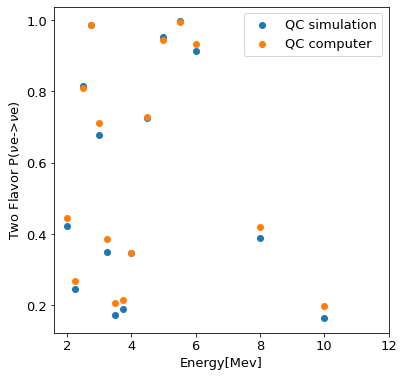

In [17]:
# Plot graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(Energy,result_list_simulation,label="QC simulation")
ax.scatter(Energy,result_list_actual,label="QC computer")
ax.set_xlabel("Energy[Mev]",fontsize=13)
ax.set_ylabel(r"Two Flavor P($\nu$e->$\nu$e)",fontsize=13)
ax.set_xticks([2e6,4e6,6e6,8e6,10e6,12e6])
ax.set_xticklabels(["2","4","6","8","10","12"],fontsize=13)
ax.legend(loc="best",fontsize=13)
ax.tick_params(labelsize=13)

In [19]:
import pandas as pd
# Summarize results from qunatum circiut computations
calculation_result_df = pd.DataFrame({"energy":energy_list_actual, 
                                      "QC_machine_result":result_list_actual,
                                      "QC_simulation_result":result_list_simulation})
calculation_result_df

,energy,QC_machine_result,QC_simulation_result
0,2000000.0,0.463867,0.434570
1,2250000.0,0.321777,0.246582
2,2500000.0,0.840088,0.822998
3,2750000.0,0.975098,0.981934
4,3000000.0,0.709717,0.691650
5,3250000.0,0.378662,0.344971
6,3500000.0,0.237061,0.166504
7,3750000.0,0.261475,0.185059
8,4000000.0,0.406250,0.327148
9,4500000.0,0.752930,0.725586
